### Installation

please fist create the following conda env, then using it in this notebook (realod window if it does not appear in the list)
    
    ```bash
$ conda create -n tvl python=3.8 -y 

$ conda activate timeeval

The following code will interact only with the jupyter kernal, if you encounter please do the following in your prompt but make sure you are in the same conda env

### Installation of GutenTag



first we proceed with gutenTAG, the Pypi version is broken, so we will install it from the github repo

In [6]:
pip install PyYAML

  Using cached PyYAML-6.0.1-cp38-cp38-macosx_11_0_arm64.whl
Note: you may need to restart the kernel to use updated packages.


In [9]:
!git clone https://github.com/TimeEval/GutenTAG.git

Cloning into 'GutenTAG'...
remote: Enumerating objects: 2375, done.
remote: Counting objects: 100% (477/477), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 2375 (delta 328), reused 315 (delta 219), pack-reused 1898
Receiving objects: 100% (2375/2375), 1.74 MiB | 2.05 MiB/s, done.
Resolving deltas: 100% (1532/1532), done.


In [13]:
cd GutenTAG

/Users/wadimoughanim/Documents/education/Master_MVA/last_mlts_proj/GutenTAG


In [14]:
pip install -e .

Obtaining file:///Users/wadimoughanim/Documents/education/Master_MVA/last_mlts_proj/GutenTAG
  Preparing metadata (setup.py) ... done
  Using cached pandas-2.0.3-cp38-cp38-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached scipy-1.10.1-cp38-cp38-macosx_12_0_arm64.whl (28.8 MB)
  Using cached scikit_learn-1.3.2-cp38-cp38-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached matplotlib-3.7.4-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.7 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl.metadata (12 kB)
  Using cached neurokit2-0.1.2-py2.py3-none-any.whl (1.0 MB)
  Using cached jsonschema-4.20.0-py3-none-any.whl.metadata (8.1 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema_specifi

quick checks

In [15]:
pip list | grep -i guten 

timeeval-gutenTAG         1.4.0        /Users/wadimoughanim/Documents/education/Master_MVA/last_mlts_proj/GutenTAG
Note: you may need to restart the kernel to use updated packages.


In [18]:
!python -m gutenTAG



                      Welcome to

       _____       _          _______       _____ _
      / ____|     | |        |__   __|/\   / ____| |
     | |  __ _   _| |_ ___ _ __ | |  /  \ | |  __| |
     | | |_ | | | | __/ _ \ '_ \| | / /\ \| | |_ | |
     | |__| | |_| | ||  __/ | | | |/ ____ \ |__| |_|
      \_____|\__,_|\__\___|_| |_|_/_/    \_\_____(_)

                     Version 1.4.0

"Good day!" wishes your friendly Timeseries Anomaly Generator.



usage: __main__.py [-h] [--version] --config-yaml CONFIG_YAML
                   [--output-dir OUTPUT_DIR] [--plot] [--no-save]
                   [--seed SEED] [--addons [ADDONS [ADDONS ...]]]
                   [--n_jobs N_JOBS] [--only ONLY]
__main__.py: error: the following arguments are required: --config-yaml


---

Now is instalation is right, let's generate a teime series and see how it looks like :

Initializing addons: 0it [00:00, ?it/s]
Generating datasets:   0%|          | 0/1 [00:00<?, ?it/s]
Finalizing addons: 0it [00:00, ?it/s]


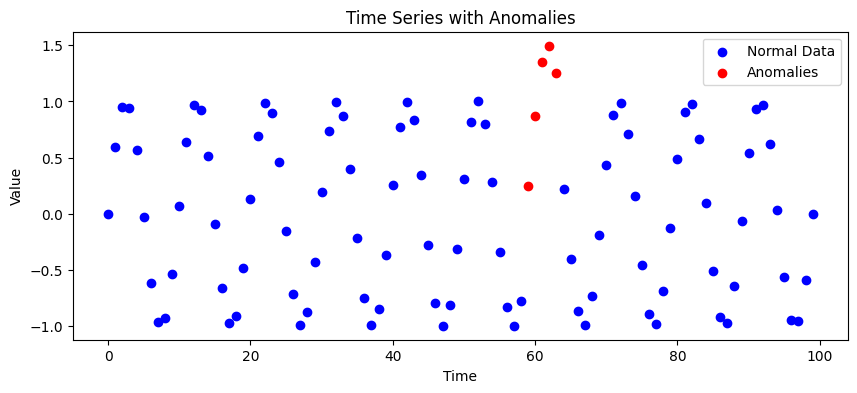

Initializing addons: 0it [00:00, ?it/s]
Generating datasets:   0%|          | 0/1 [00:00<?, ?it/s]
Finalizing addons: 0it [00:00, ?it/s]


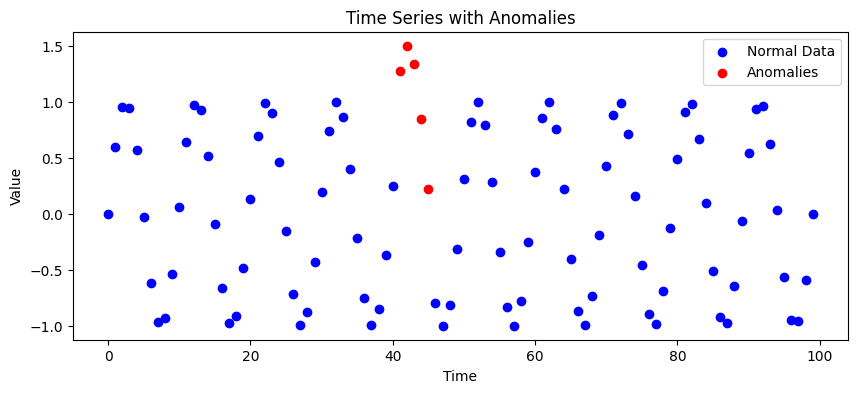

Initializing addons: 0it [00:00, ?it/s]
Generating datasets:   0%|          | 0/1 [00:00<?, ?it/s]
Finalizing addons: 0it [00:00, ?it/s]


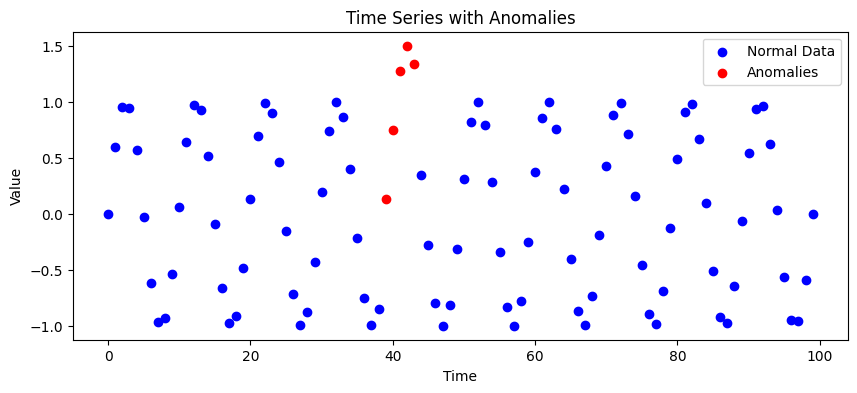

Initializing addons: 0it [00:00, ?it/s]
Generating datasets:   0%|          | 0/1 [00:00<?, ?it/s]
Finalizing addons: 0it [00:00, ?it/s]


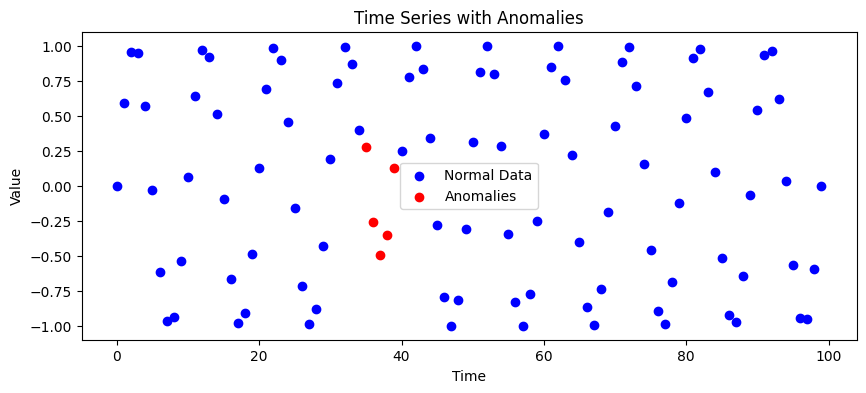

In [21]:
import matplotlib.pyplot as plt
from gutenTAG import GutenTAG, LABEL_COLUMN_NAME

config = {
    "timeseries": [
        {
            "name": "testt",
            "length": 100,
            "base-oscillations": [{"kind": "sine"}],
            "anomalies": [{"length": 5, "kinds": [{"kind": "mean", "offset": 0.5}]}]
        }
    ]
}
for i in range(6, 10):
    gutentag = GutenTAG(seed=i)
    gutentag.load_config_dict(config)
    datasets = gutentag.generate(return_timeseries=True)
    df = datasets[0].timeseries
    plt.figure(figsize=(10, 4))
    # Normal data points in blue
    normal_data = df[df[LABEL_COLUMN_NAME] == 0]
    plt.scatter(normal_data.index, normal_data.iloc[:, 0], color='blue', label='Normal Data')

    # Anomalies in red
    anomalies = df[df[LABEL_COLUMN_NAME] == 1]
    plt.scatter(anomalies.index, anomalies.iloc[:, 0], color='red', label='Anomalies')

    plt.title("Time Series with Anomalies")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

We have generated a sinusoid with a 'mean offset' of 10 as we can see (4 exemples)